In [93]:
# pip install PyWavelets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
sns.set_style("white")
mapacolor = 'RdBu_r'

# NOTEBOOK DE ANALISIS DE SERIES TEMPORALES

## SERIE TEMPORAL

In [94]:
fs = 4800
f = 100
L = 10

t = np.arange(L * fs)/fs
serie = np.sin(2 * np.pi * f * np.sin(2 * np.pi * f * t) * t)

## EXPLORACIÓN Y VISUALIZACIÓN

[(0.0, 0.2)]

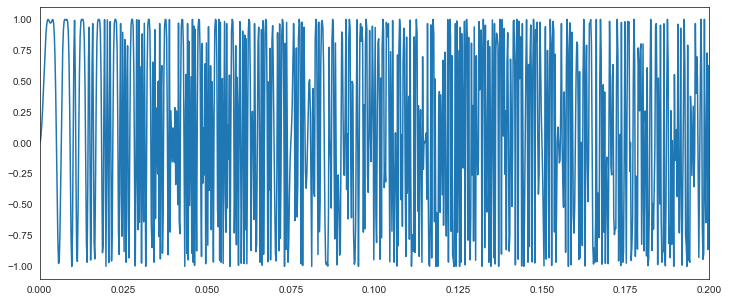

In [95]:
fig, ax = plt.subplots(figsize=(12,5))
g = sns.lineplot(x = t, y = serie)
g.set(xlim=(0, 20/f))

## FOURIER

Espectro unilateral de fourier

[(0.0, 2639.8949999954157)]

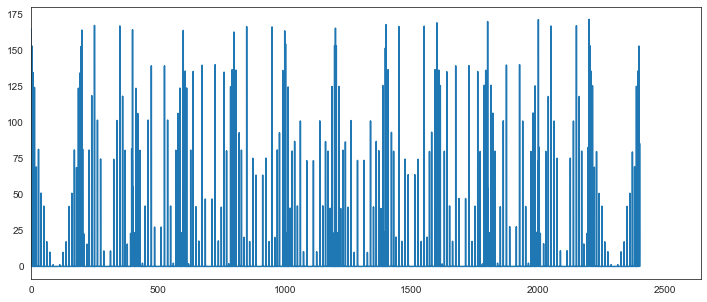

In [96]:
n_samples = np.size(serie)
freqs = np.arange(-fs/2, fs/2-1/fs, fs/n_samples) 

serie_F = np.fft.fftshift(np.fft.fft(serie))
serie_SSPS = 2*(abs(serie_F)**2)/n_samples

fig, ax = plt.subplots(figsize=(12,5))
g = sns.lineplot(x = freqs, y = serie_SSPS)
g.set(xlim=(0, None))

## SPECTROGRAMA

In [97]:
from scipy import signal
from scipy.fft import fftshift

<ipython-input-98-bed5fbebbc44>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = plt.pcolormesh(t, f, Sxx, cmap = mapacolor)


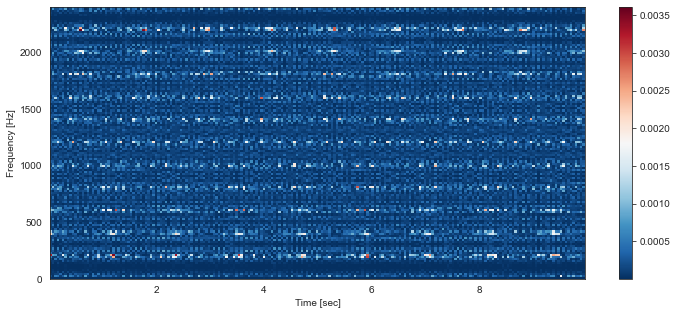

In [98]:
fig, ax = plt.subplots(figsize=(12,5))
f, t, Sxx = signal.spectrogram(serie, fs)
p = plt.pcolormesh(t, f, Sxx, cmap = mapacolor)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
fig.colorbar(p, ax=ax)
plt.show()

## WAVELETS

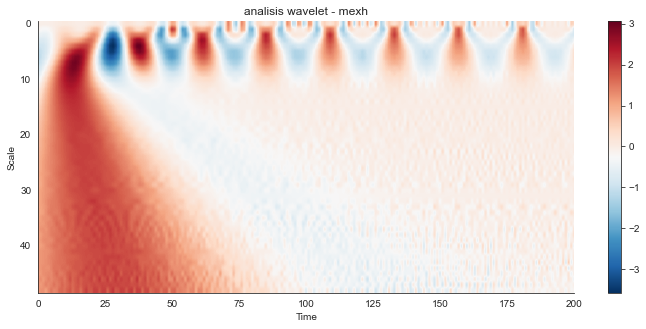

In [99]:
# parametros 
# pywt.families()

wavelet_name = 'mexh'
fig, ax = plt.subplots(figsize=(12,5))
coef, freqs = pywt.cwt(serie, np.arange(1,50), wavelet_name)
p = ax.imshow(coef, cmap = mapacolor, aspect = 'auto')
ax.set_title('analisis wavelet - ' + wavelet_name)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Scale')
ax.set_xlabel('Time')
plt.xlim((0, 200))
fig.colorbar(p, ax=ax);

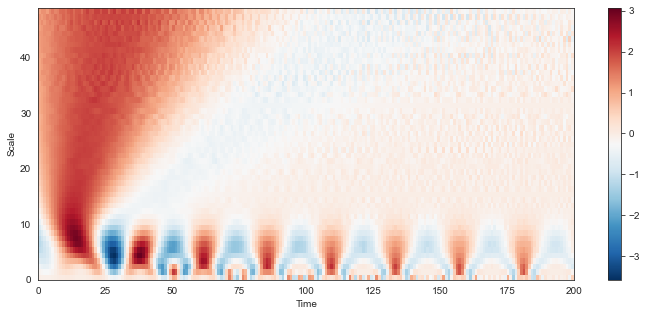

In [102]:
fig, ax = plt.subplots(figsize=(12,5))
plt.pcolormesh(coef, cmap = mapacolor)
ax.set_ylabel('Scale')
ax.set_xlabel('Time')
plt.xlim((0, 200))
fig.colorbar(p, ax=ax);

## EMD

## AR, ARMA, ARIMA